In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv(r"./ml-latest-small/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
ratings.shape

(100836, 4)

In [5]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
ratings.duplicated().sum()

np.int64(0)

## Rating Distribution

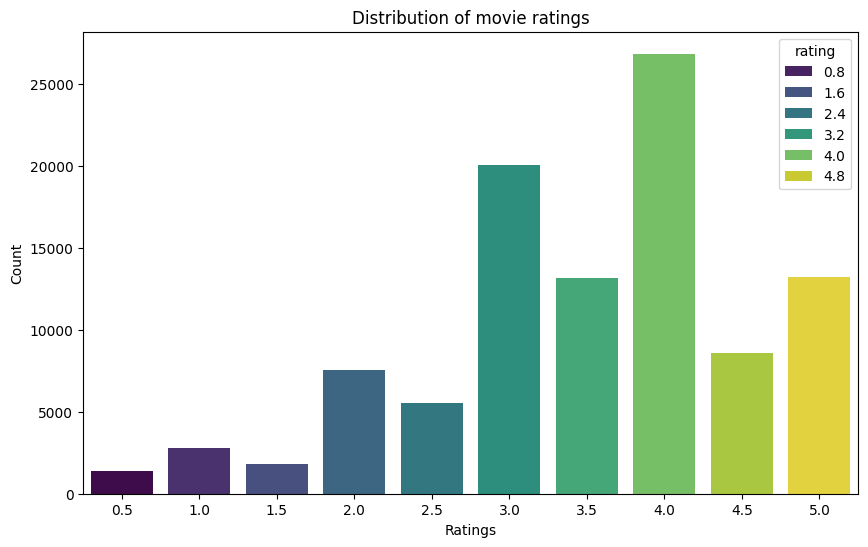

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'rating', data= ratings, palette='viridis', hue='rating')
plt.title('Distribution of movie ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

## Number of rating per user

In [9]:
user_rating_count = ratings['userId'].value_counts()
user_rating_count

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64

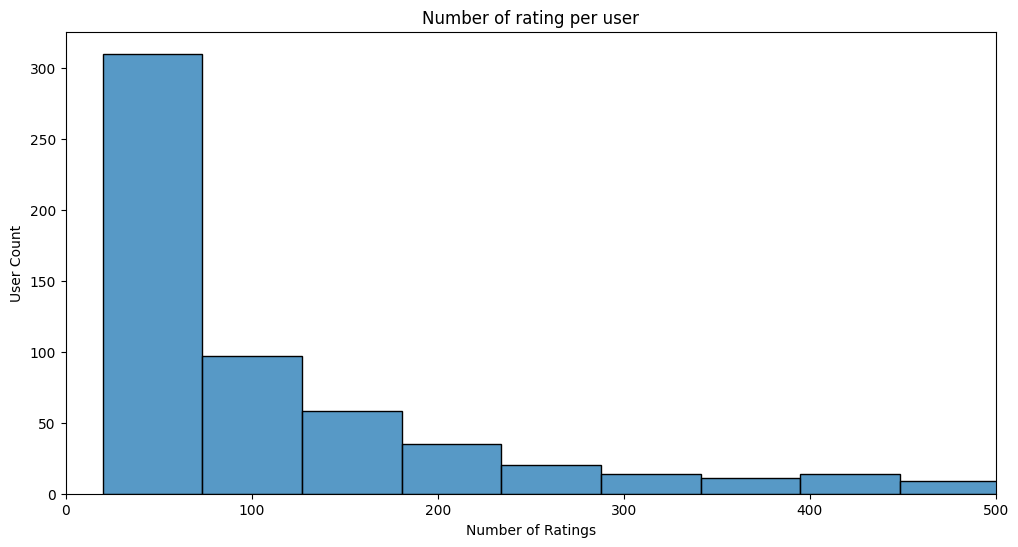

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(user_rating_count, bins=50, kde = False)
plt.title('Number of rating per user')
plt.xlabel('Number of Ratings')
plt.ylabel("User Count")
plt.xlim(0, 500)
plt.show()

## Number of Rating per Movie

In [11]:
movie_per_rating = ratings['movieId'].value_counts()
movie_per_rating

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

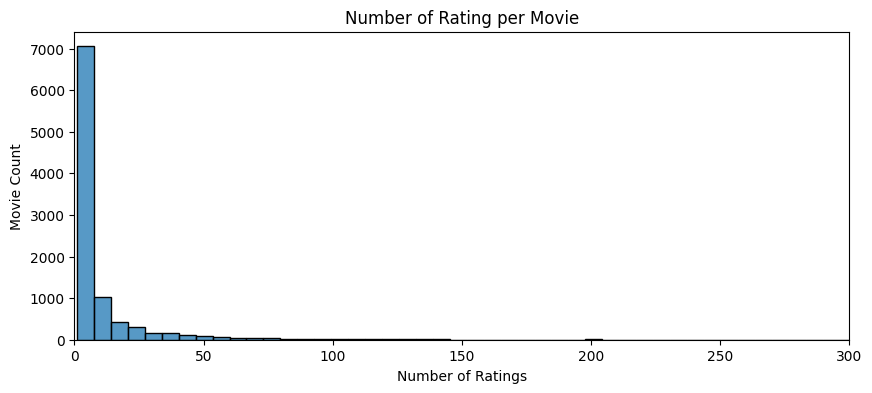

In [12]:
plt.figure(figsize=(10, 4))
sns.histplot(movie_per_rating, kde=False, bins=50)
plt.title('Number of Rating per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Count')
plt.xlim(0, 300)
plt.show()

## Average Rating per Movie

In [13]:
avg_rating = ratings.groupby('movieId')['rating'].mean()
avg_rating

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

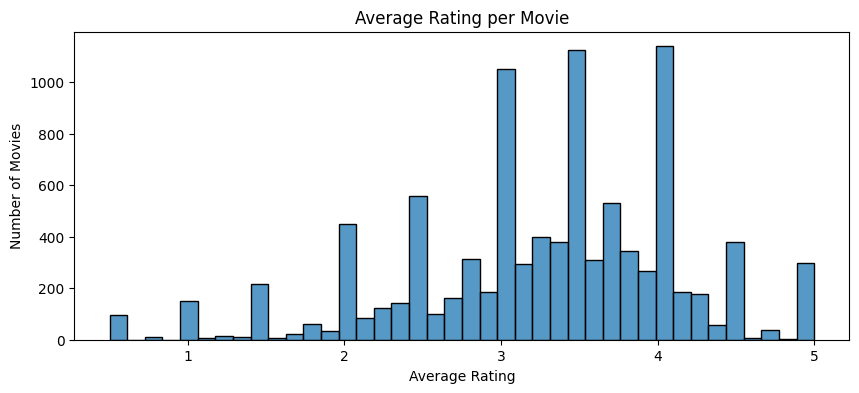

In [14]:
plt.figure(figsize=(10, 4))
sns.histplot(avg_rating, bins=40, kde= False)
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel("Number of Movies")
plt.show()

## User-Item Matrix
<p>Rows = users</p>
<p>Columns = movies</p>
<p>Values = ratings (NaN if no rating)</p>

In [15]:
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

In [16]:
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_item_matrix.shape

(610, 9724)

## Cosine Similarity between Users

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
user_similarity = cosine_similarity(user_item_matrix)

In [20]:
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [21]:
user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [22]:
user_similarity_df.shape

(610, 610)

## Find top Similar users

In [23]:
def get_top_similar_user(user_id, n=10): 
    if user_id not in user_similarity_df.index: 
        print(f"User {user_id} not found.")
        return []

    sim_scores = user_similarity_df.loc[user_id].drop(user_id).sort_values(ascending=False)
    return sim_scores.head(n)

In [24]:
get_top_similar_user(5)

userId
470    0.520671
229    0.517333
565    0.511325
235    0.507638
142    0.474124
476    0.453262
512    0.453101
58     0.452609
379    0.452029
468    0.446811
Name: 5, dtype: float64

## Predict Ratings for Unseen Movies for the User

In [25]:
def predict_ratings(user_id, top_n_neighbors=10): 
    similar_user = get_top_similar_user(user_id, n = top_n_neighbors)
    similar_users_ids = similar_user.index

    neighbors_rating = user_item_matrix.loc[similar_users_ids]
    sim_scores = similar_user.values.reshape(-1, 1)
    weighted_rating = neighbors_rating.mul(sim_scores, axis=0).sum(axis=0)
    sim_sums = (neighbors_rating > 0).mul(sim_scores, axis=0).sum(axis=0)
    sim_sums[sim_sums == 0] = 1e-9

    pred_ratings = weighted_rating / sim_sums

    user_rated = user_item_matrix.loc[user_id]
    pred_ratings = pred_ratings[user_rated == 0]

    return pred_ratings.sort_values(ascending=False)

In [26]:
user_id = 5
predict_ratings(user_id)

movieId
529       5.0
293       5.0
315       5.0
333       5.0
218       5.0
         ... 
4580      0.0
4581      0.0
4583      0.0
4584      0.0
193609    0.0
Length: 9680, dtype: float64

## Recommed Top Movies Based on predictions

In [27]:
movies = pd.read_csv(r"./ml-latest-small/movies.csv")
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [28]:
def recommend_movie(user_id, top_n=10, top_n_neighbors=10):
    pred_ratings = predict_ratings(user_id, top_n_neighbors = top_n_neighbors)
    top_movies_ids = pred_ratings.head(top_n).index

    recommended_movie = movies[movies['movieId'].isin(top_movies_ids)][['movieId', 'title', 'genres']]
    recommended_movie['predicted_rating'] = pred_ratings[top_movies_ids].values
   
    
    return recommended_movie.reset_index()

In [29]:
user_id = 5
recommend_movie(user_id)

,index,movieId,title,genres,predicted_rating
0,24,25,Leaving Las Vegas (1995),Drama|Romance,5.0
1,140,168,First Knight (1995),Action|Drama|Romance,5.0
2,186,218,Boys on the Side (1995),Comedy|Drama,5.0
3,189,222,Circle of Friends (1995),Drama|Romance,5.0
4,254,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,5.0
5,274,315,"Specialist, The (1994)",Action|Drama|Thriller,5.0
6,291,333,Tommy Boy (1995),Comedy,5.0
7,463,529,Searching for Bobby Fischer (1993),Drama,5.0
8,577,708,"Truth About Cats & Dogs, The (1996)",Comedy|Romance,5.0
9,615,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,5.0


## Item Based Collaborative Filtering

In [30]:
item_user_matrix = user_item_matrix.T

In [31]:
item_similarity = cosine_similarity(item_user_matrix)

In [32]:
item_similarity_df = pd.DataFrame(item_similarity, index = item_user_matrix.index, columns=item_user_matrix.index)

In [33]:
item_similarity_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
item_similarity_df.shape

(9724, 9724)

## Predict Ratings Based on Items Similar to Those the User Rated

In [35]:
def predict_ratings_item_based(user_id, top_n_similar_items=10):
    user_rating = user_item_matrix.loc[user_id]
    rated_movies = user_rating[user_rating > 0].index

    scores = {}
    sim_sums = {} 

    for movie in user_item_matrix.columns: 
        if movie in rated_movies: 
            continue

        similar_movies = item_similarity_df[movie].drop(movie)
        similar_movies = similar_movies[similar_movies.index.isin(rated_movies)]
        top_similar = similar_movies.sort_values(ascending=False).head(top_n_similar_items)

        weighted_sum = 0
        sim_sum = 0

        for sim_movie, sim_score in top_similar.items():
            rating = user_rating[sim_movie]
            weighted_sum += sim_score * rating
            sim_sum += sim_score

        if sim_sum > 0: 
            scores[movie] = weighted_sum / sim_sum

    predict_ratings = pd.Series(scores).sort_values(ascending=False)
    return predict_ratings

In [36]:
def recommend_movies_item_based(user_id, top_n=10, top_n_similar_items=5):
    pred_ratings = predict_ratings_item_based(user_id, top_n_similar_items=top_n_similar_items)
    top_movies_ids = pred_ratings.head(top_n).index
    
    recommended_movies = movies[movies['movieId'].isin(top_movies_ids)][['movieId', 'title', 'genres']]
    
    recommended_movies = recommended_movies.set_index('movieId').loc[top_movies_ids]
    recommended_movies['predicted_rating'] = pred_ratings[top_movies_ids].values
    
    return recommended_movies.reset_index()


In [37]:
user_id = 5
recommend_movies_item_based(user_id)

,index,title,genres,predicted_rating
0,49793,We Are Marshall (2006),Drama,5.0
1,52712,"Invisible, The (2007)",Crime|Drama|Fantasy|Mystery|Thriller,5.0
2,83601,Amer (2009),Drama|Horror,5.0
3,27075,Addams Family Reunion (1998),Children|Comedy|Fantasy,5.0
4,6093,"Last Unicorn, The (1982)",Animation|Children|Fantasy,5.0
5,50923,"Astronaut Farmer, The (2007)",Drama,5.0
6,5764,Looker (1981),Drama|Horror|Sci-Fi|Thriller,5.0
7,6517,"Babe, The (1992)",Drama,5.0
8,2493,"Harmonists, The (1997)",Drama,5.0
9,3599,Anchors Aweigh (1945),Comedy|Musical,5.0
